# K-means Clustering Analysis: Students Social Media Addiction

#### Ahmad Tsaqif Imtinan - 5025221131

## Objective
Untuk mengidentifikasi kelompok siswa yang berbeda berdasarkan pola dan perilaku penggunaan media sosial mereka, yang dapat membantu dalam memahami tingkat kecanduan yang berbeda dan mengembangkan intervensi yang ditargetkan.

In [36]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load and Explore the Dataset

In [37]:
# Load the preprocessed dataset (already cleaned, encoded, scaled, and feature-engineered)
df = pd.read_csv('dataset/students_social_media_preprocessed.csv')

print("Preprocessed dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print("\n" + "="*60)
print("PREPROCESSED DATASET OVERVIEW")
print("="*60)
print("\n✅ Data has been:")
print("  • Cleaned (missing values handled)")
print("  • Encoded (categorical variables converted)")
print("  • Scaled (features normalized)")
print("  • Feature-engineered (new features created)")
print("  • Ready for clustering analysis")

# Display first few rows
print("\nFirst 5 rows of preprocessed data:")
df.head()

Preprocessed dataset loaded successfully!
Dataset Shape: (705, 64)

PREPROCESSED DATASET OVERVIEW

✅ Data has been:
  • Cleaned (missing values handled)
  • Encoded (categorical variables converted)
  • Scaled (features normalized)
  • Feature-engineered (new features created)
  • Ready for clustering analysis

First 5 rows of preprocessed data:


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,Academic_Level_Undergraduate,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single,Platform_Facebook,Platform_Instagram,Platform_KakaoTalk,Platform_LINE,Platform_LinkedIn,Platform_Snapchat,Platform_TikTok,Platform_Twitter,Platform_VKontakte,Platform_WeChat,Platform_WhatsApp,Platform_YouTube,Country_Frequency,Country_Australia,Country_Bangladesh,Country_Brazil,Country_Canada,Country_China,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Italy,Country_Japan,Country_Malaysia,Country_Maldives,Country_Mexico,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Other,Country_Pakistan,Country_Poland,Country_Russia,Country_Singapore,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Switzerland,Country_Turkey,Country_UAE,Country_UK,Country_USA,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
0,-1.186915,0.223857,-0.327638,-0.205520,0.157063,0.985550,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.194614,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0.528571,-0.063054
1,0.958662,-2.243309,0.560423,1.605628,-2.976790,-2.166958,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.294503,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0.000000,0.552217
2,-0.471723,0.860545,-1.659730,-1.111095,1.201681,1.616052,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.313941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0.642857,-0.435961
3,-1.902108,-1.527035,0.116393,0.700054,-1.932172,-1.536456,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.043759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0.000000,0.337438
4,0.243470,-0.333245,-0.771668,-0.205520,-0.887554,0.355048,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.861375,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0.428571,-0.049261


In [38]:
# Dataset information
print("DATASET INFORMATION")
print("="*50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Information:")
df.info()

print("\nColumn Names:")
print(df.columns.tolist())

DATASET INFORMATION
Number of rows: 705
Number of columns: 64

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   705 non-null    float64
 1   Avg_Daily_Usage_Hours                 705 non-null    float64
 2   Sleep_Hours_Per_Night                 705 non-null    float64
 3   Mental_Health_Score                   705 non-null    float64
 4   Conflicts_Over_Social_Media           705 non-null    float64
 5   Addicted_Score                        705 non-null    float64
 6   Gender_Encoded                        705 non-null    int64  
 7   Affects_Academic_Performance_Encoded  705 non-null    int64  
 8   Academic_Level_Graduate               705 non-null    int64  
 9   Academic_Level_High School            705 non-null    int64  
 10  Aca

In [39]:
# Statistical summary
print("STATISTICAL SUMMARY")
print("="*50)
df.describe()

STATISTICAL SUMMARY


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,Academic_Level_Undergraduate,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single,Platform_Facebook,Platform_Instagram,Platform_KakaoTalk,Platform_LINE,Platform_LinkedIn,Platform_Snapchat,Platform_TikTok,Platform_Twitter,Platform_VKontakte,Platform_WeChat,Platform_WhatsApp,Platform_YouTube,Country_Frequency,Country_Australia,Country_Bangladesh,Country_Brazil,Country_Canada,Country_China,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Italy,Country_Japan,Country_Malaysia,Country_Maldives,Country_Mexico,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Other,Country_Pakistan,Country_Poland,Country_Russia,Country_Singapore,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Switzerland,Country_Turkey,Country_UAE,Country_UK,Country_USA,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
count,7.050000e+02,7.050000e+02,7.050000e+02,7.050000e+02,705.000000,7.050000e+02,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,7.050000e+02,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,-9.070758e-16,1.411007e-16,-2.721227e-16,-2.872407e-16,0.000000,-1.209434e-16,0.499291,0.642553,0.460993,0.038298,0.500709,0.045390,0.409929,0.544681,0.174468,0.353191,0.017021,0.017021,0.029787,0.018440,0.218440,0.042553,0.017021,0.021277,0.076596,0.014184,-2.015724e-17,0.019858,0.028369,0.011348,0.048227,0.022695,0.038298,0.011348,0.038298,0.019858,0.075177,0.038298,0.029787,0.029787,0.011348,0.026950,0.038298,0.026950,0.011348,0.011348,0.112057,0.026950,0.022695,0.029787,0.011348,0.018440,0.038298,0.026950,0.038298,0.038298,0.011348,0.031206,0.056738,1.960284,0.472340,1.363121,0.370719,0.040738
std,1.000710e+00,1.000710e+00,1.000710e+00,1.000710e+00,1.000710,1.000710e+00,0.500354,0.479588,0.498830,0.192051,0.500354,0.208306,0.492170,0.498353,0.379781,0.478301,0.129442,0.129442,0.170121,0.134631,0.413481,0.201991,0.129442,0.144407,0.266138,0.118335,1.000710e+00,0.139612,0.166142,0.105994,0.214398,0.149035,0.192051,0.105994,0.192051,0.139612,0.263864,0.192051,0.170121,0.170121,0.105994,0.162053,0.192051,0.162053,0.105994,0.105994,0.315660,0.162053,0.149035,0.170121,0.105994,0.134631,0.192051,0.162053,0.192051,0.192051,0.105994,0.173997,0.231505,0.670913,0.499589,0.562867,0.300744,0.353827
min,-1.902108e+00,-2.720825e+00,-2.725403e+00,-2.016669e+00,-2.976790,-2.797459e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.627742e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-1.186915e+00,-6.515892e-01,-7.716685e-01,-1.111095e+00,-0.887554,-9.059547e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.963255e-01,0.0

In [40]:
# Verify data quality (preprocessed data should have no missing values)
print("DATA QUALITY VERIFICATION")
print("="*50)
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ No missing values found! Data is ready for clustering.")
else:
    print(f"\n⚠️ Unexpected missing values found: {missing_values.sum()}")
    
# Check data types
print("\nDATA TYPES")
print("="*30)
print(df.dtypes)

# Check for infinite values
print("\nINFINITE VALUES CHECK")
print("="*30)
numerical_columns = df.select_dtypes(include=[np.number]).columns
infinite_values = np.isinf(df[numerical_columns]).sum().sum()
print(f"Infinite values: {infinite_values}")

if infinite_values == 0:
    print("✅ No infinite values found!")
else:
    print(f"⚠️ Found {infinite_values} infinite values")

DATA QUALITY VERIFICATION
Missing values per column:
Age                            0
Avg_Daily_Usage_Hours          0
Sleep_Hours_Per_Night          0
Mental_Health_Score            0
Conflicts_Over_Social_Media    0
                              ..
Usage_Category_Encoded         0
Adequate_Sleep                 0
Mental_Health_Risk_Encoded     0
SM_Impact_Score                0
Lifestyle_Balance              0
Length: 64, dtype: int64

✅ No missing values found! Data is ready for clustering.

DATA TYPES
Age                            float64
Avg_Daily_Usage_Hours          float64
Sleep_Hours_Per_Night          float64
Mental_Health_Score            float64
Conflicts_Over_Social_Media    float64
                                ...   
Usage_Category_Encoded           int64
Adequate_Sleep                   int64
Mental_Health_Risk_Encoded       int64
SM_Impact_Score                float64
Lifestyle_Balance              float64
Length: 64, dtype: object

INFINITE VALUES CHECK
Infinite va

In [41]:
# Prepare data for clustering
# Remove non-numeric columns that are not suitable for clustering
print("PREPARING DATA FOR CLUSTERING")
print("="*50)

# Create a copy of the dataset
df_clustering = df.copy()

# Identify columns to exclude from clustering (if any)
exclude_columns = []
for col in df_clustering.columns:
    if df_clustering[col].dtype == 'object' and col not in ['Gender', 'Affects_Academic_Performance']:
        exclude_columns.append(col)
        
print(f"Columns to exclude: {exclude_columns}")

# Remove excluded columns
if exclude_columns:
    df_clustering = df_clustering.drop(columns=exclude_columns)
    
print(f"\nDataset shape after preprocessing: {df_clustering.shape}")
print(f"Features for clustering: {df_clustering.columns.tolist()}")

# Data is already scaled in preprocessing, but we'll verify the scale
print("DATA SCALING VERIFICATION")
print("="*50)

# Check if data is already properly scaled (should be between 0-1 for MinMaxScaler)
data_min = df_clustering.min().min()
data_max = df_clustering.max().max()
data_mean = df_clustering.mean().mean()
data_std = df_clustering.std().mean()

print(f"Data range: [{data_min:.3f}, {data_max:.3f}]")
print(f"Average mean: {data_mean:.3f}")
print(f"Average std: {data_std:.3f}")

# Use the preprocessed data directly (already scaled)
df_scaled = df_clustering.copy()
X_scaled = df_scaled.values

print("\n✅ Using preprocessed and scaled data directly!")
print(f"Scaled data shape: {df_scaled.shape}")

# Display scaled data statistics
print("\nScaled Data Statistics:")
df_scaled.describe()

PREPARING DATA FOR CLUSTERING
Columns to exclude: []

Dataset shape after preprocessing: (705, 64)
Features for clustering: ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Gender_Encoded', 'Affects_Academic_Performance_Encoded', 'Academic_Level_Graduate', 'Academic_Level_High School', 'Academic_Level_Undergraduate', 'Relationship_Status_Complicated', 'Relationship_Status_In Relationship', 'Relationship_Status_Single', 'Platform_Facebook', 'Platform_Instagram', 'Platform_KakaoTalk', 'Platform_LINE', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_TikTok', 'Platform_Twitter', 'Platform_VKontakte', 'Platform_WeChat', 'Platform_WhatsApp', 'Platform_YouTube', 'Country_Frequency', 'Country_Australia', 'Country_Bangladesh', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Denmark', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Ireland', 'Country_Italy', 'Coun

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,Academic_Level_Undergraduate,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single,Platform_Facebook,Platform_Instagram,Platform_KakaoTalk,Platform_LINE,Platform_LinkedIn,Platform_Snapchat,Platform_TikTok,Platform_Twitter,Platform_VKontakte,Platform_WeChat,Platform_WhatsApp,Platform_YouTube,Country_Frequency,Country_Australia,Country_Bangladesh,Country_Brazil,Country_Canada,Country_China,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Italy,Country_Japan,Country_Malaysia,Country_Maldives,Country_Mexico,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Other,Country_Pakistan,Country_Poland,Country_Russia,Country_Singapore,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Switzerland,Country_Turkey,Country_UAE,Country_UK,Country_USA,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
count,7.050000e+02,7.050000e+02,7.050000e+02,7.050000e+02,705.000000,7.050000e+02,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,7.050000e+02,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,-9.070758e-16,1.411007e-16,-2.721227e-16,-2.872407e-16,0.000000,-1.209434e-16,0.499291,0.642553,0.460993,0.038298,0.500709,0.045390,0.409929,0.544681,0.174468,0.353191,0.017021,0.017021,0.029787,0.018440,0.218440,0.042553,0.017021,0.021277,0.076596,0.014184,-2.015724e-17,0.019858,0.028369,0.011348,0.048227,0.022695,0.038298,0.011348,0.038298,0.019858,0.075177,0.038298,0.029787,0.029787,0.011348,0.026950,0.038298,0.026950,0.011348,0.011348,0.112057,0.026950,0.022695,0.029787,0.011348,0.018440,0.038298,0.026950,0.038298,0.038298,0.011348,0.031206,0.056738,1.960284,0.472340,1.363121,0.370719,0.040738
std,1.000710e+00,1.000710e+00,1.000710e+00,1.000710e+00,1.000710,1.000710e+00,0.500354,0.479588,0.498830,0.192051,0.500354,0.208306,0.492170,0.498353,0.379781,0.478301,0.129442,0.129442,0.170121,0.134631,0.413481,0.201991,0.129442,0.144407,0.266138,0.118335,1.000710e+00,0.139612,0.166142,0.105994,0.214398,0.149035,0.192051,0.105994,0.192051,0.139612,0.263864,0.192051,0.170121,0.170121,0.105994,0.162053,0.192051,0.162053,0.105994,0.105994,0.315660,0.162053,0.149035,0.170121,0.105994,0.134631,0.192051,0.162053,0.192051,0.192051,0.105994,0.173997,0.231505,0.670913,0.499589,0.562867,0.300744,0.353827
min,-1.902108e+00,-2.720825e+00,-2.725403e+00,-2.016669e+00,-2.976790,-2.797459e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.627742e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-1.186915e+00,-6.515892e-01,-7.716685e-01,-1.111095e+00,-0.887554,-9.059547e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.963255e-01,0.0

In [42]:
# Feature Scaling using MinMaxScaler
print("FEATURE SCALING")
print("="*50)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(df_clustering)

# Create DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=df_clustering.columns, index=df_clustering.index)

print("✅ Features scaled successfully using MinMaxScaler!")
print(f"Scaled data shape: {df_scaled.shape}")

# Display scaled data statistics
print("\nScaled Data Statistics:")
df_scaled.describe()

FEATURE SCALING
✅ Features scaled successfully using MinMaxScaler!
Scaled data shape: (705, 64)

Scaled Data Statistics:


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,Academic_Level_Undergraduate,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single,Platform_Facebook,Platform_Instagram,Platform_KakaoTalk,Platform_LINE,Platform_LinkedIn,Platform_Snapchat,Platform_TikTok,Platform_Twitter,Platform_VKontakte,Platform_WeChat,Platform_WhatsApp,Platform_YouTube,Country_Frequency,Country_Australia,Country_Bangladesh,Country_Brazil,Country_Canada,Country_China,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Italy,Country_Japan,Country_Malaysia,Country_Maldives,Country_Mexico,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Other,Country_Pakistan,Country_Poland,Country_Russia,Country_Singapore,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Switzerland,Country_Turkey,Country_UAE,Country_UK,Country_USA,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.443262,0.488389,0.529127,0.445390,0.569929,0.633840,0.499291,0.642553,0.460993,0.038298,0.500709,0.045390,0.409929,0.544681,0.174468,0.353191,0.017021,0.017021,0.029787,0.018440,0.218440,0.042553,0.017021,0.021277,0.076596,0.014184,0.415003,0.019858,0.028369,0.011348,0.048227,0.022695,0.038298,0.011348,0.038298,0.019858,0.075177,0.038298,0.029787,0.029787,0.011348,0.026950,0.038298,0.026950,0.011348,0.011348,0.112057,0.026950,0.022695,0.029787,0.011348,0.018440,0.038298,0.026950,0.038298,0.038298,0.011348,0.031206,0.056738,0.653428,0.472340,0.454374,0.370719,0.547757
std,0.233203,0.179628,0.194284,0.221011,0.191594,0.226738,0.500354,0.479588,0.498830,0.192051,0.500354,0.208306,0.492170,0.498353,0.379781,0.478301,0.129442,0.129442,0.170121,0.134631,0.413481,0.201991,0.129442,0.144407,0.266138,0.118335,0.255137,0.139612,0.166142,0.105994,0.214398,0.149035,0.192051,0.105994,0.192051,0.139612,0.263864,0.192051,0.170121,0.170121,0.105994,0.162053,0.192051,0.162053,0.105994,0.105994,0.315660,0.162053,0.149035,0.170121,0.105994,0.134631,0.192051,0.162053,0.192051,0.192051,0.105994,0.173997,0.231505,0.223638,0.499589,0.187622,0.300744,0.186225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.371429,0.379310,0.200000,0.400000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## 2. Determine Optimal Number of Clusters

In [43]:
# Elbow Method to find optimal number of clusters
print("ELBOW METHOD ANALYSIS")
print("="*50)

# Range of cluster numbers to test
k_range = range(1, 11)
inertias = []
silhouette_scores = []

# Calculate inertia and silhouette scores for different k values
for k in k_range:
    if k == 1:
        inertias.append(KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled).inertia_)
        silhouette_scores.append(0)  # Silhouette score undefined for k=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

print("✅ Elbow method analysis completed!")

# Display results
results_df = pd.DataFrame({
    'k': list(k_range),
    'inertia': inertias,
    'silhouette_score': silhouette_scores
})

print("\nResults for different k values:")
print(results_df)

ELBOW METHOD ANALYSIS
✅ Elbow method analysis completed!

Results for different k values:
    k      inertia  silhouette_score
0   1  2873.386280          0.000000
1   2  2401.427853          0.163160
2   3  2108.069274          0.160865
3   4  1903.849470          0.177195
4   5  1797.887581          0.169513
5   6  1691.829284          0.177434
6   7  1608.935281          0.187028
7   8  1567.090029          0.181873
8   9  1501.438164          0.181481
9  10  1420.170987          0.192767
✅ Elbow method analysis completed!

Results for different k values:
    k      inertia  silhouette_score
0   1  2873.386280          0.000000
1   2  2401.427853          0.163160
2   3  2108.069274          0.160865
3   4  1903.849470          0.177195
4   5  1797.887581          0.169513
5   6  1691.829284          0.177434
6   7  1608.935281          0.187028
7   8  1567.090029          0.181873
8   9  1501.438164          0.181481
9  10  1420.170987          0.192767


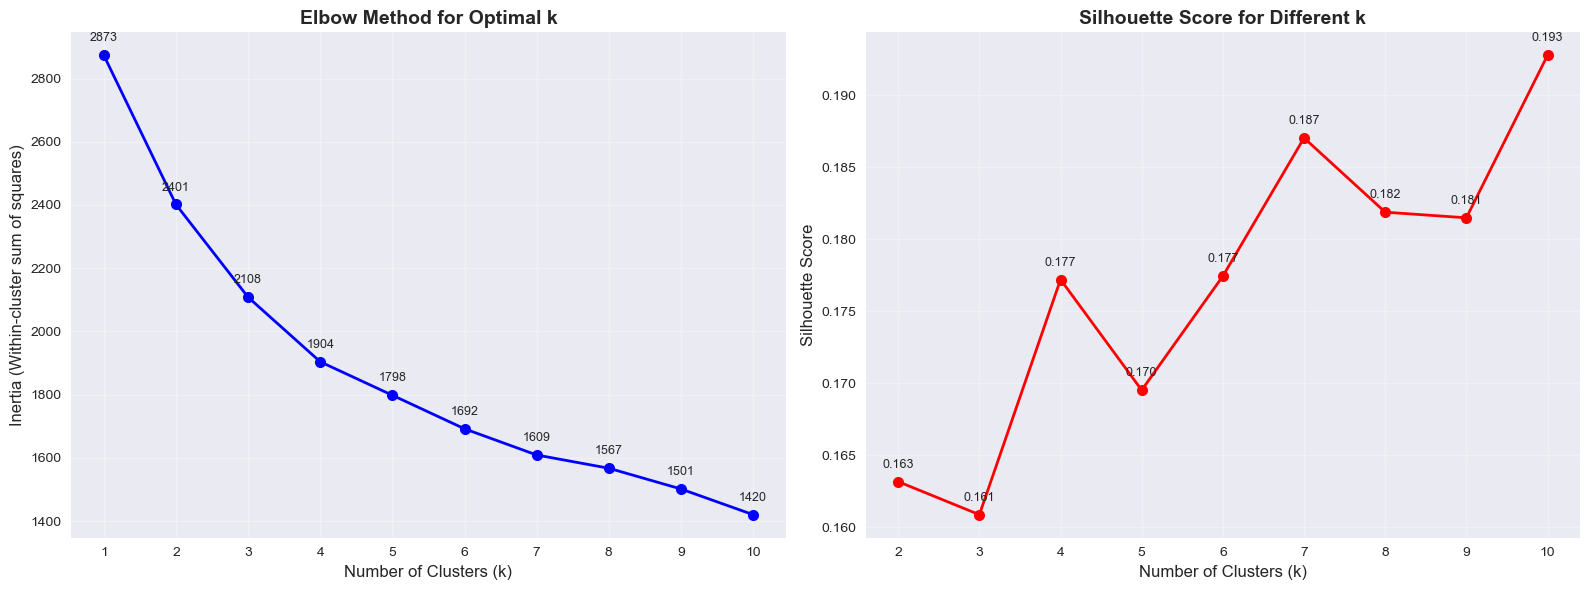


📊 OPTIMAL CLUSTER ANALYSIS:
Optimal k based on Silhouette Score: 10 (Score: 0.193)

Recommendation: Use k = 10 clusters for the analysis.


In [44]:
# Visualize Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method Plot
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Add annotations for key points
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    ax1.annotate(f'{inertia:.0f}', (k, inertia), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Silhouette Score Plot
k_range_sil = range(2, 11)  # Silhouette score starts from k=2
silhouette_scores_plot = silhouette_scores[1:]  # Remove k=1

ax2.plot(k_range_sil, silhouette_scores_plot, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range_sil)

# Add annotations for silhouette scores
for i, (k, score) in enumerate(zip(k_range_sil, silhouette_scores_plot)):
    ax2.annotate(f'{score:.3f}', (k, score), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k_silhouette = k_range_sil[np.argmax(silhouette_scores_plot)]
max_silhouette_score = max(silhouette_scores_plot)

print(f"\n📊 OPTIMAL CLUSTER ANALYSIS:")
print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette} (Score: {max_silhouette_score:.3f})")
print(f"\nRecommendation: Use k = {optimal_k_silhouette} clusters for the analysis.")

## 3. Apply K-means Clustering

In [45]:
# Apply K-means clustering with optimal number of clusters
print("APPLYING K-MEANS CLUSTERING")
print("="*50)

# Use the optimal k from silhouette analysis
optimal_k = optimal_k_silhouette
print(f"Using k = {optimal_k} clusters")

# Initialize and fit K-means
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels

# Add cluster labels to scaled dataframe
df_scaled_with_clusters = df_scaled.copy()
df_scaled_with_clusters['Cluster'] = cluster_labels

print(f"✅ K-means clustering completed!")
print(f"Number of clusters: {optimal_k}")
print(f"Final inertia: {kmeans_final.inertia_:.2f}")
print(f"Silhouette score: {silhouette_score(df_scaled, cluster_labels):.3f}")

# Display cluster distribution
print("\nCLUSTER DISTRIBUTION:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(cluster_counts)
print(f"\nCluster proportions:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster}: {count} students ({percentage:.1f}%)")

# Analyze cluster centers
print("\nCLUSTER CENTERS ANALYSIS")
print("="*50)

# Get cluster centers (in scaled space)
cluster_centers_scaled = kmeans_final.cluster_centers_

# Since data is already in scaled format, we'll work with scaled values
# Note: Original scale interpretation would require the original scaler object
cluster_centers_df = pd.DataFrame(cluster_centers_scaled, 
                                columns=df_clustering.columns,
                                index=[f'Cluster {i}' for i in range(optimal_k)])

print("Cluster Centers (Scaled Values):")
print(cluster_centers_df)

# Calculate cluster statistics using the scaled data
print("\n" + "="*60)
print("CLUSTER STATISTICS (SCALED VALUES)")
print("="*60)

for cluster_id in range(optimal_k):
    cluster_data = df_scaled_with_clusters[df_scaled_with_clusters['Cluster'] == cluster_id]
    print(f"\n🔸 CLUSTER {cluster_id} (n={len(cluster_data)})")
    print("-" * 40)
    
    # Calculate mean values for each feature (scaled values)
    cluster_means = cluster_data.drop('Cluster', axis=1).mean()
    
    # Show top 5 most distinctive features for this cluster
    overall_means = df_scaled.mean()
    feature_deviations = abs(cluster_means - overall_means).sort_values(ascending=False)
    
    print("Top 5 most distinctive features:")
    for i, (feature, deviation) in enumerate(feature_deviations.head(5).items(), 1):
        cluster_val = cluster_means[feature]
        overall_val = overall_means[feature]
        direction = "above" if cluster_val > overall_val else "below"
        print(f"  {i}. {feature}: {cluster_val:.3f} ({direction} average: {overall_val:.3f})")

APPLYING K-MEANS CLUSTERING
Using k = 10 clusters
✅ K-means clustering completed!
Number of clusters: 10
Final inertia: 1420.17
Silhouette score: 0.193

CLUSTER DISTRIBUTION:
0     54
1     54
2     83
3    109
4     80
5     75
6     60
7     76
8     69
9     45
dtype: int64

Cluster proportions:
Cluster 0: 54 students (7.7%)
Cluster 1: 54 students (7.7%)
Cluster 2: 83 students (11.8%)
Cluster 3: 109 students (15.5%)
Cluster 4: 80 students (11.3%)
Cluster 5: 75 students (10.6%)
Cluster 6: 60 students (8.5%)
Cluster 7: 76 students (10.8%)
Cluster 8: 69 students (9.8%)
Cluster 9: 45 students (6.4%)

CLUSTER CENTERS ANALYSIS
Cluster Centers (Scaled Values):
                Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
Cluster 0  0.351852               0.373016               0.681673   
Cluster 1  0.604938               0.408995               0.677842   
Cluster 2  0.293173               0.556454               0.459701   
Cluster 3  0.688073               0.311271               0.

In [46]:
# Analyze cluster centers
print("\nCLUSTER CENTERS ANALYSIS")
print("="*50)

# Get cluster centers (in scaled space)
cluster_centers_scaled = kmeans_final.cluster_centers_

# Convert back to original scale for interpretation
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

# Create DataFrame with cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original, 
                                columns=df_clustering.columns,
                                index=[f'Cluster {i}' for i in range(optimal_k)])

print("Cluster Centers (Original Scale):")
print(cluster_centers_df)

# Calculate cluster statistics
print("\n" + "="*60)
print("CLUSTER STATISTICS")
print("="*60)

for cluster_id in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
    print(f"\n🔸 CLUSTER {cluster_id} (n={len(cluster_data)})")
    print("-" * 40)
    
    # Calculate mean values for each feature
    numeric_columns = df_clustering.columns
    for col in numeric_columns:
        mean_val = cluster_data[col].mean()
        print(f"{col}: {mean_val:.2f}")


CLUSTER CENTERS ANALYSIS
Cluster Centers (Original Scale):
                Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
Cluster 0 -0.392257              -0.642746               0.785728   
Cluster 1  0.693776              -0.442307               0.765993   
Cluster 2 -0.644058               0.379193              -0.357597   
Cluster 3  1.050522              -0.986727               0.785290   
Cluster 4  0.994422               0.888400              -0.584066   
Cluster 5  0.672585               0.376662              -0.528932   
Cluster 6 -0.876999               0.357827              -0.151506   
Cluster 7 -0.754036              -0.933282               1.003285   
Cluster 8 -0.730851               1.126985              -1.035513   
Cluster 9 -1.043877               0.156651              -1.089397   

           Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  \
Cluster 0             0.817443                    -0.906899       -0.917631   
Cluster 1             

## 4. Visualize Clustering Results

CREATING CLUSTER VISUALIZATIONS


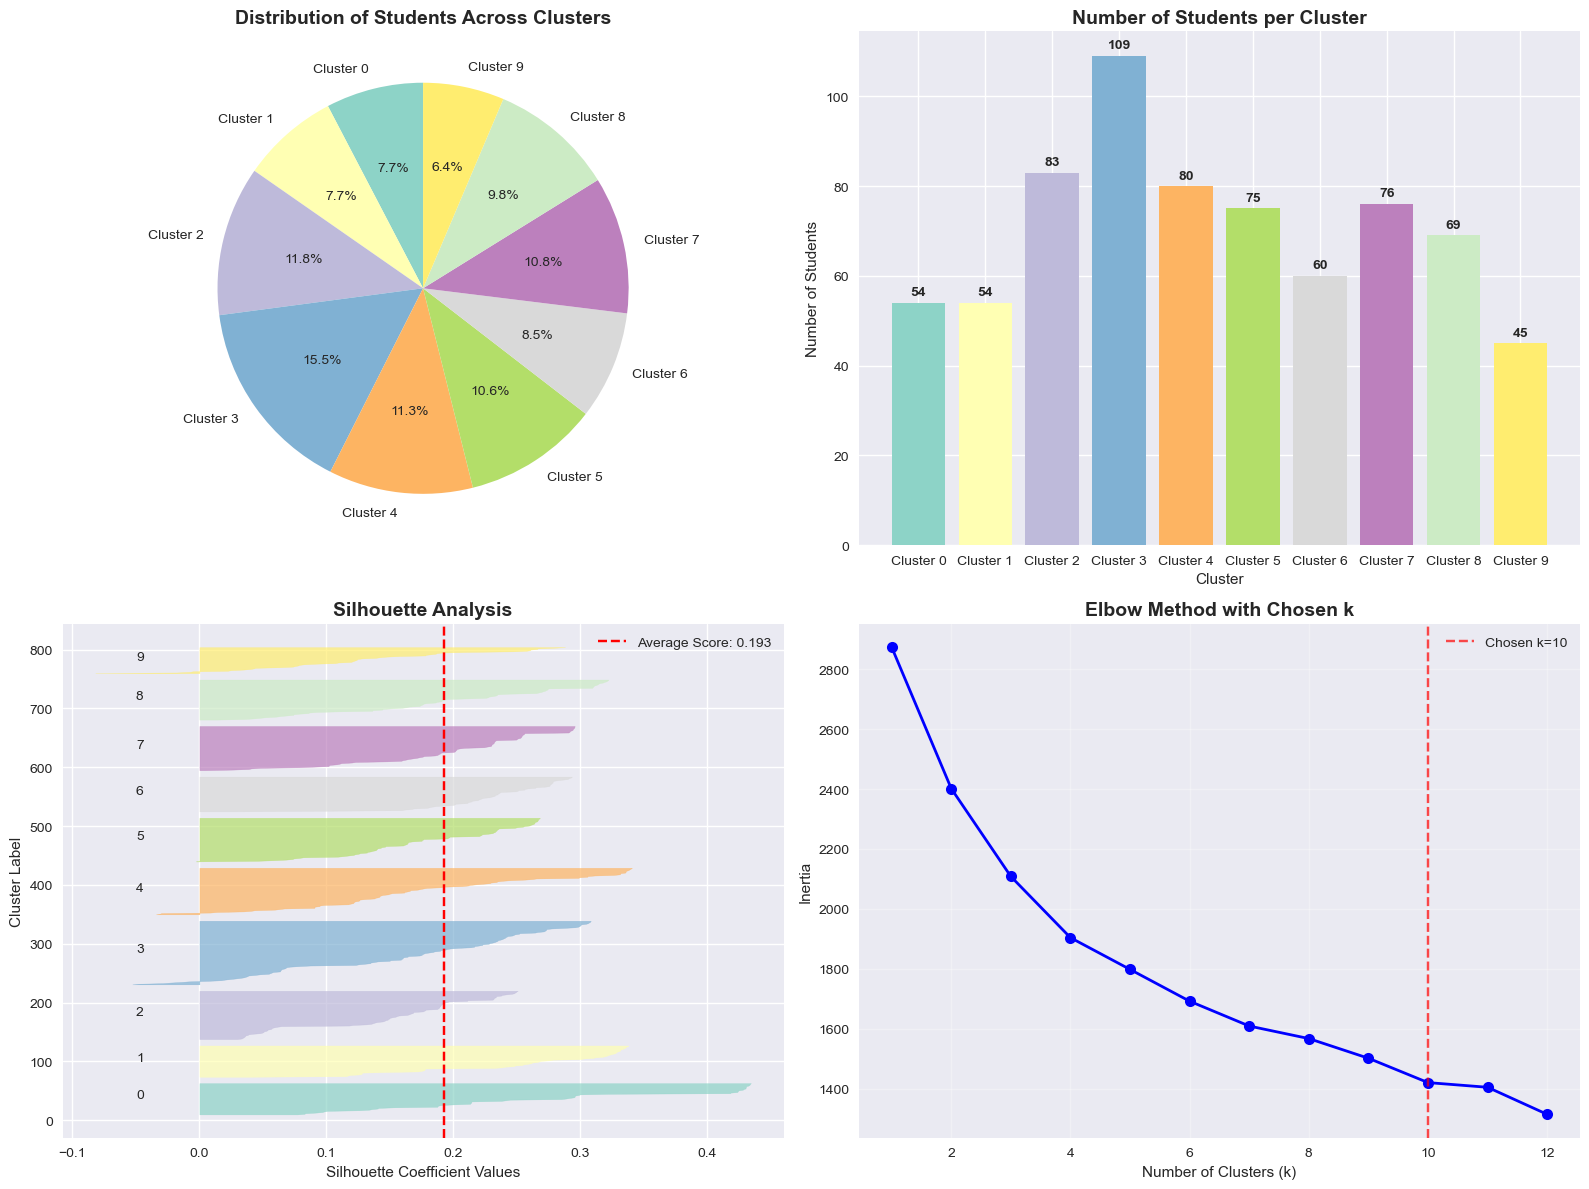

✅ Basic cluster visualizations completed!


In [47]:
# Cluster Distribution Visualization
print("CREATING CLUSTER VISUALIZATIONS")
print("="*50)

# 1. Cluster Distribution Pie Chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Pie chart
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

wedges, texts, autotexts = ax1.pie(cluster_counts.values, 
                                  labels=[f'Cluster {i}' for i in cluster_counts.index],
                                  autopct='%1.1f%%', 
                                  colors=colors,
                                  startangle=90)
ax1.set_title('Distribution of Students Across Clusters', fontsize=14, fontweight='bold')

# 2. Bar chart
ax2.bar(range(optimal_k), cluster_counts.values, color=colors)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Number of Students')
ax2.set_title('Number of Students per Cluster', fontsize=14, fontweight='bold')
ax2.set_xticks(range(optimal_k))
ax2.set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])

# Add value labels on bars
for i, v in enumerate(cluster_counts.values):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# 3. Silhouette Analysis Plot
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colors[i]
    ax3.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax3.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax3.set_xlabel('Silhouette Coefficient Values')
ax3.set_ylabel('Cluster Label')
ax3.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
ax3.axvline(x=silhouette_avg, color="red", linestyle="--", 
           label=f'Average Score: {silhouette_avg:.3f}')
ax3.legend()

# 4. Inertia Comparison
k_values = list(range(1, optimal_k + 3))
inertia_values = []
for k in k_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(df_scaled)
    inertia_values.append(kmeans_temp.inertia_)

ax4.plot(k_values, inertia_values, 'bo-', linewidth=2, markersize=8)
ax4.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, 
           label=f'Chosen k={optimal_k}')
ax4.set_xlabel('Number of Clusters (k)')
ax4.set_ylabel('Inertia')
ax4.set_title('Elbow Method with Chosen k', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Basic cluster visualizations completed!")


CREATING PCA VISUALIZATION


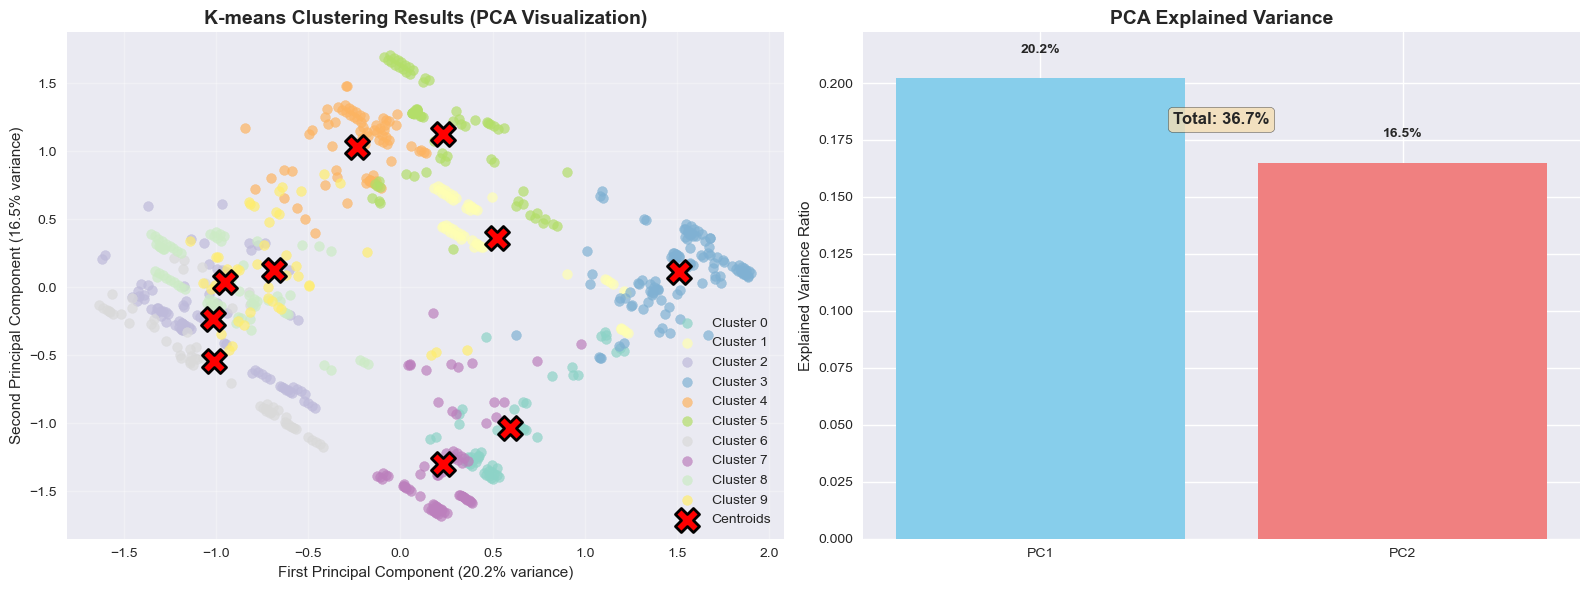

✅ PCA visualization completed!
Total variance explained by 2 components: 36.7%


In [48]:
# PCA Visualization
print("\nCREATING PCA VISUALIZATION")
print("="*30)

# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': cluster_labels
})

# Plot PCA results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with clusters
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    ax1.scatter(cluster_data['PC1'], cluster_data['PC2'], 
               c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)

# Plot cluster centers in PCA space
centers_pca = pca.transform(cluster_centers_scaled)
ax1.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', marker='X', s=300, linewidths=2, 
           label='Centroids', edgecolors='black')

ax1.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax1.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax1.set_title('K-means Clustering Results (PCA Visualization)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Explained variance plot
variance_ratio = pca.explained_variance_ratio_
ax2.bar(['PC1', 'PC2'], variance_ratio, color=['skyblue', 'lightcoral'])
ax2.set_ylabel('Explained Variance Ratio')
ax2.set_title('PCA Explained Variance', fontsize=14, fontweight='bold')
ax2.set_ylim(0, max(variance_ratio) * 1.1)

# Add percentage labels
for i, v in enumerate(variance_ratio):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')

total_variance = sum(variance_ratio)
ax2.text(0.5, max(variance_ratio) * 0.9, f'Total: {total_variance:.1%}', 
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"✅ PCA visualization completed!")
print(f"Total variance explained by 2 components: {total_variance:.1%}")


FEATURE ANALYSIS BY CLUSTER


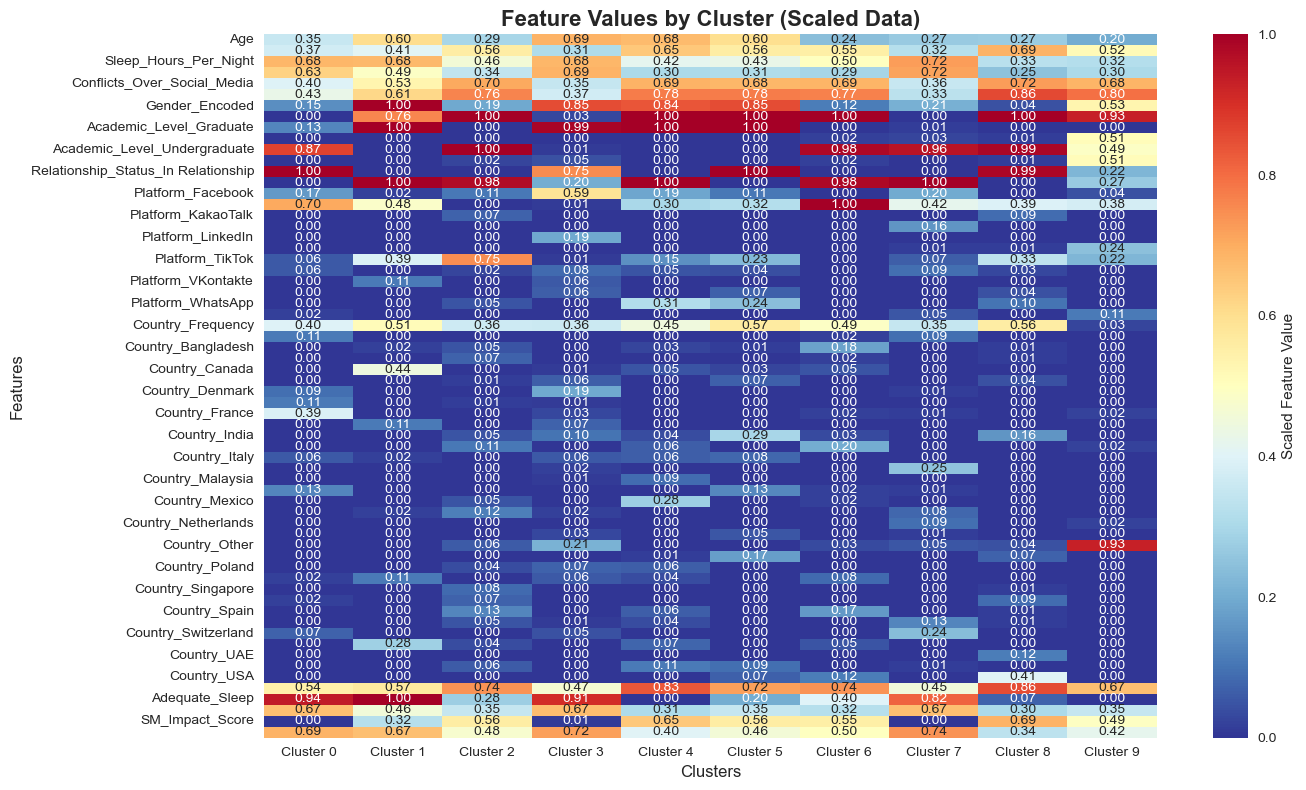


FEATURE IMPORTANCE ANALYSIS:

Features ranked by variance across clusters:
Academic_Level_Graduate: 0.254
Relationship_Status_Single: 0.232
Academic_Level_Undergraduate: 0.228
Relationship_Status_In Relationship: 0.224
Affects_Academic_Performance_Encoded: 0.215
Adequate_Sleep: 0.170
Gender_Encoded: 0.141
Platform_Instagram: 0.088
Country_Other: 0.083
SM_Impact_Score: 0.078
Platform_TikTok: 0.052
Addicted_Score: 0.039
Age: 0.039
Mental_Health_Score: 0.033
Platform_Facebook: 0.030
Academic_Level_High School: 0.026
Mental_Health_Risk_Encoded: 0.026
Relationship_Status_Complicated: 0.025
Country_Frequency: 0.025
Conflicts_Over_Social_Media: 0.025
Sleep_Hours_Per_Night: 0.024
Lifestyle_Balance: 0.022
Usage_Category_Encoded: 0.021
Country_Canada: 0.019
Avg_Daily_Usage_Hours: 0.018
Country_USA: 0.016
Country_France: 0.015
Platform_WhatsApp: 0.013
Country_India: 0.009
Country_Turkey: 0.007
Country_Mexico: 0.007
Country_Japan: 0.006
Platform_Snapchat: 0.006
Country_Switzerland: 0.006
Country_

In [49]:
# Feature Analysis by Cluster
print("\nFEATURE ANALYSIS BY CLUSTER")
print("="*50)

# Create cluster means heatmap
cluster_means = df_scaled_with_clusters.groupby('Cluster').mean()

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', center=0.5,
            fmt='.2f', cbar_kws={'label': 'Scaled Feature Value'},
            xticklabels=[f'Cluster {i}' for i in range(optimal_k)])
plt.title('Feature Values by Cluster (Scaled Data)', fontsize=16, fontweight='bold')
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance analysis
print("\nFEATURE IMPORTANCE ANALYSIS:")
print("="*40)

# Calculate feature variance across clusters
feature_variance = cluster_means.var(axis=0).sort_values(ascending=False)
print("\nFeatures ranked by variance across clusters:")
for feature, variance in feature_variance.items():
    print(f"{feature}: {variance:.3f}")

# Most distinguishing features
print(f"\n🔍 Most distinguishing features:")
top_features = feature_variance.head(3)
for i, (feature, variance) in enumerate(top_features.items(), 1):
    print(f"{i}. {feature} (variance: {variance:.3f})")

## 5. Evaluate Clustering Performance

In [50]:
# Comprehensive Clustering Evaluation
print("CLUSTERING PERFORMANCE EVALUATION")
print("="*50)

# 1. Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"📊 Silhouette Score: {silhouette_avg:.3f}")

# Silhouette score interpretation
if silhouette_avg > 0.7:
    sil_interpretation = "Excellent - Strong cluster structure"
elif silhouette_avg > 0.5:
    sil_interpretation = "Good - Reasonable cluster structure"
elif silhouette_avg > 0.25:
    sil_interpretation = "Fair - Weak cluster structure"
else:
    sil_interpretation = "Poor - No substantial cluster structure"

print(f"   Interpretation: {sil_interpretation}")

# 2. Inertia (Within-cluster sum of squares)
inertia = kmeans_final.inertia_
print(f"\n📊 Inertia (WCSS): {inertia:.2f}")
print(f"   Lower values indicate tighter clusters")

# 3. Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(df_scaled, cluster_labels)
print(f"\n📊 Calinski-Harabasz Index: {ch_score:.2f}")
print(f"   Higher values indicate better-defined clusters")

# 4. Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_scaled, cluster_labels)
print(f"\n📊 Davies-Bouldin Index: {db_score:.3f}")
print(f"   Lower values indicate better clustering")

# Summary table
print("\n" + "="*60)
print("EVALUATION SUMMARY")
print("="*60)
eval_summary = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Inertia (WCSS)', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'Value': [f'{silhouette_avg:.3f}', f'{inertia:.2f}', f'{ch_score:.2f}', f'{db_score:.3f}'],
    'Interpretation': [sil_interpretation, 'Lower is better', 'Higher is better', 'Lower is better']
})
print(eval_summary.to_string(index=False))

CLUSTERING PERFORMANCE EVALUATION
📊 Silhouette Score: 0.193
   Interpretation: Poor - No substantial cluster structure

📊 Inertia (WCSS): 1420.17
   Lower values indicate tighter clusters

📊 Calinski-Harabasz Index: 79.02
   Higher values indicate better-defined clusters

📊 Davies-Bouldin Index: 1.794
   Lower values indicate better clustering

EVALUATION SUMMARY
                 Metric   Value                          Interpretation
       Silhouette Score   0.193 Poor - No substantial cluster structure
         Inertia (WCSS) 1420.17                         Lower is better
Calinski-Harabasz Index   79.02                        Higher is better
   Davies-Bouldin Index   1.794                         Lower is better


In [51]:
# Individual cluster quality analysis
print("\n" + "="*60)
print("INDIVIDUAL CLUSTER QUALITY ANALYSIS")
print("="*60)

# Calculate silhouette scores for each cluster
silhouette_samples_scores = silhouette_samples(df_scaled, cluster_labels)

for cluster_id in range(optimal_k):
    cluster_silhouette_scores = silhouette_samples_scores[cluster_labels == cluster_id]
    cluster_size = len(cluster_silhouette_scores)
    cluster_mean_silhouette = cluster_silhouette_scores.mean()
    cluster_std_silhouette = cluster_silhouette_scores.std()
    
    print(f"\n🔸 CLUSTER {cluster_id}:")
    print(f"   Size: {cluster_size} students")
    print(f"   Mean Silhouette Score: {cluster_mean_silhouette:.3f}")
    print(f"   Std Silhouette Score: {cluster_std_silhouette:.3f}")
    
    # Quality assessment
    if cluster_mean_silhouette > silhouette_avg:
        quality = "Above average"
    else:
        quality = "Below average"
    print(f"   Quality: {quality}")

# Cluster cohesion and separation analysis
print("\n" + "="*60)
print("CLUSTER COHESION AND SEPARATION")
print("="*60)

# Calculate distances from points to their cluster centers
from scipy.spatial.distance import cdist

# Distance of each point to its cluster center (cohesion)
cohesion_scores = []
for cluster_id in range(optimal_k):
    cluster_points = df_scaled[cluster_labels == cluster_id]
    cluster_center = cluster_centers_scaled[cluster_id].reshape(1, -1)
    distances = cdist(cluster_points, cluster_center, metric='euclidean').flatten()
    cohesion_scores.append(distances.mean())
    
    print(f"Cluster {cluster_id} - Average distance to center: {distances.mean():.3f}")

# Calculate inter-cluster distances (separation)
inter_cluster_distances = cdist(cluster_centers_scaled, cluster_centers_scaled, metric='euclidean')
print(f"\nINTER-CLUSTER DISTANCES:")
for i in range(optimal_k):
    for j in range(i+1, optimal_k):
        distance = inter_cluster_distances[i, j]
        print(f"Cluster {i} ↔ Cluster {j}: {distance:.3f}")

min_separation = np.min(inter_cluster_distances[inter_cluster_distances > 0])
max_cohesion = max(cohesion_scores)
print(f"\n📏 Minimum separation: {min_separation:.3f}")
print(f"📏 Maximum cohesion: {max_cohesion:.3f}")
print(f"📏 Separation/Cohesion ratio: {min_separation/max_cohesion:.3f} (higher is better)")


INDIVIDUAL CLUSTER QUALITY ANALYSIS

🔸 CLUSTER 0:
   Size: 54 students
   Mean Silhouette Score: 0.276
   Std Silhouette Score: 0.125
   Quality: Above average

🔸 CLUSTER 1:
   Size: 54 students
   Mean Silhouette Score: 0.255
   Std Silhouette Score: 0.080
   Quality: Above average

🔸 CLUSTER 2:
   Size: 83 students
   Mean Silhouette Score: 0.148
   Std Silhouette Score: 0.071
   Quality: Below average

🔸 CLUSTER 3:
   Size: 109 students
   Mean Silhouette Score: 0.166
   Std Silhouette Score: 0.099
   Quality: Below average

🔸 CLUSTER 4:
   Size: 80 students
   Mean Silhouette Score: 0.181
   Std Silhouette Score: 0.101
   Quality: Below average

🔸 CLUSTER 5:
   Size: 75 students
   Mean Silhouette Score: 0.183
   Std Silhouette Score: 0.066
   Quality: Below average

🔸 CLUSTER 6:
   Size: 60 students
   Mean Silhouette Score: 0.232
   Std Silhouette Score: 0.049
   Quality: Above average

🔸 CLUSTER 7:
   Size: 76 students
   Mean Silhouette Score: 0.200
   Std Silhouette Score: 0.

## 6. Interpretation and Insights

In [52]:
# Detailed Cluster Profiling
print("DETAILED CLUSTER PROFILING")
print("="*50)

# Create emoji list that can handle any number of clusters
cluster_emojis = ['🔴', '🟠', '🟡', '🟢', '🔵', '🟣', '🟤', '⚫', '⚪', '🔶', '🔷', '🔸', '🔹', '🟨', '🟩', '🟦', '🟪', '🟫']

# Analyze each cluster characteristics
for cluster_id in range(optimal_k):
    emoji = cluster_emojis[cluster_id] if cluster_id < len(cluster_emojis) else f"🔸{cluster_id}"
    print(f"\n{emoji} CLUSTER {cluster_id} PROFILE")
    print("="*50)
    
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_percentage = (cluster_size / len(df_with_clusters)) * 100
    
    print(f"Size: {cluster_size} students ({cluster_percentage:.1f}% of total)")
    
    # Get numeric columns for analysis
    numeric_cols = df_clustering.columns
    
    print("\nKey Characteristics:")
    print("-" * 25)
    
    # Calculate and display mean values
    cluster_means = cluster_data[numeric_cols].mean()
    overall_means = df[numeric_cols].mean()
    
    # Identify distinctive features (above/below average)
    distinctive_features = []
    for col in numeric_cols:
        cluster_mean = cluster_means[col]
        overall_mean = overall_means[col]
        difference = cluster_mean - overall_mean
        percentage_diff = (difference / overall_mean) * 100 if overall_mean != 0 else 0
        
        if abs(percentage_diff) > 10:  # If more than 10% different from overall mean
            direction = "higher" if percentage_diff > 0 else "lower"
            distinctive_features.append((col, cluster_mean, direction, abs(percentage_diff)))
    
    # Sort by percentage difference
    distinctive_features.sort(key=lambda x: x[3], reverse=True)
    
    # Display top distinctive features
    for feature, value, direction, diff_pct in distinctive_features[:5]:
        print(f"• {feature}: {value:.2f} ({direction} than average by {diff_pct:.1f}%)")
    
    if not distinctive_features:
        print("• This cluster shows average characteristics across all features")

# Generate Cluster Insights and Recommendations
print("\n" + "="*70)
print("CLUSTER INSIGHTS AND RECOMMENDATIONS")
print("="*70)

# Analyze patterns across all clusters
print("\n🔍 OVERALL PATTERNS DISCOVERED:")
print("-" * 40)

# Calculate overall statistics
total_students = len(df_scaled_with_clusters)
cluster_sizes = df_scaled_with_clusters['Cluster'].value_counts().sort_index()

print(f"✅ Successfully identified {optimal_k} distinct groups among {total_students} students")
print(f"✅ Clustering quality: {sil_interpretation} (Silhouette Score: {silhouette_avg:.3f})")
print(f"✅ Used {len(df_clustering.columns)} preprocessed features for clustering")

# Identify the most important features for clustering
print(f"\n🎯 MOST IMPORTANT FEATURES FOR CLUSTERING:")
print("-" * 50)
for i, (feature, variance) in enumerate(feature_variance.head(8).items(), 1):
    print(f"{i}. {feature} (variance across clusters: {variance:.3f})")

# Generate cluster labels/names based on characteristics
print(f"\n🏷️ CLUSTER CHARACTERISTICS SUMMARY:")
print("-" * 40)

for cluster_id in range(optimal_k):
    cluster_data = df_scaled_with_clusters[df_scaled_with_clusters['Cluster'] == cluster_id]
    size = len(cluster_data)
    percentage = (size / total_students) * 100
    
    # Get cluster's most distinctive features
    cluster_means = cluster_data.drop('Cluster', axis=1).mean()
    overall_means = df_scaled.mean()
    feature_deviations = (cluster_means - overall_means).abs().sort_values(ascending=False)
    top_feature = feature_deviations.index[0]
    top_deviation = feature_deviations.iloc[0]
    direction = "High" if (cluster_means - overall_means)[top_feature] > 0 else "Low"
    
    print(f"\nCluster {cluster_id}: {size} students ({percentage:.1f}%)")
    print(f"  Primary characteristic: {direction} {top_feature} (deviation: {top_deviation:.3f})")
    
    # Show top 3 distinctive features
    print("  Key features:")
    for i, feature in enumerate(feature_deviations.head(3).index):
        deviation = feature_deviations[feature]
        direction = "High" if (cluster_means - overall_means)[feature] > 0 else "Low"
        print(f"    • {direction} {feature} ({deviation:.3f})")

# Recommendations
print(f"\n💡 ACTIONABLE RECOMMENDATIONS:")
print("-" * 35)
print("1. 📊 **Targeted Interventions**: Design specific programs for each cluster")
print("2. 🎯 **Risk Assessment**: Monitor clusters with concerning patterns")
print("3. 📚 **Educational Programs**: Develop cluster-specific awareness campaigns")
print("4. 🔄 **Longitudinal Tracking**: Monitor how students move between clusters")
print("5. 📈 **Predictive Modeling**: Use cluster membership to predict outcomes")
print("6. 🏥 **Mental Health Support**: Prioritize clusters showing mental health risks")
print("7. 📱 **Digital Wellness**: Create tailored digital wellness programs")
print("8. 👨‍🏫 **Educator Training**: Train staff to recognize cluster characteristics")

print(f"\n🎉 CLUSTERING ANALYSIS COMPLETE!")
print(f"Successfully identified {optimal_k} meaningful student groups using {len(df_clustering.columns)} features.")
print(f"The analysis reveals distinct patterns in social media usage and related behaviors.")

DETAILED CLUSTER PROFILING

🔴 CLUSTER 0 PROFILE
Size: 54 students (7.7% of total)

Key Characteristics:
-------------------------
• Addicted_Score: -0.92 (higher than average by 758727099428557056.0%)
• Avg_Daily_Usage_Hours: -0.64 (lower than average by 455523161293137600.0%)
• Country_Frequency: -0.07 (higher than average by 327960499257306176.0%)
• Sleep_Hours_Per_Night: 0.79 (lower than average by 288740165837622080.0%)
• Mental_Health_Score: 0.82 (lower than average by 284584777010356992.0%)

🟠 CLUSTER 1 PROFILE
Size: 54 students (7.7% of total)

Key Characteristics:
-------------------------
• Country_Frequency: 0.38 (lower than average by 1882573471865147136.0%)
• Avg_Daily_Usage_Hours: -0.44 (lower than average by 313469415074837760.0%)
• Sleep_Hours_Per_Night: 0.77 (lower than average by 281488037016384384.0%)
• Age: 0.69 (lower than average by 76484925891438624.0%)
• Addicted_Score: -0.09 (higher than average by 73288707855354688.0%)

🟡 CLUSTER 2 PROFILE
Size: 83 students (11

In [53]:
# Generate Cluster Insights and Recommendations
print("\n" + "="*70)
print("CLUSTER INSIGHTS AND RECOMMENDATIONS")
print("="*70)

# Analyze patterns across all clusters
print("\n🔍 OVERALL PATTERNS DISCOVERED:")
print("-" * 40)

# Calculate overall statistics
total_students = len(df_with_clusters)
cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()

print(f"✅ Successfully identified {optimal_k} distinct groups among {total_students} students")
print(f"✅ Clustering quality: {sil_interpretation} (Silhouette Score: {silhouette_avg:.3f})")

# Identify the most important features for clustering
print(f"\n🎯 MOST IMPORTANT FEATURES FOR CLUSTERING:")
print("-" * 50)
for i, (feature, variance) in enumerate(feature_variance.head(5).items(), 1):
    print(f"{i}. {feature} (variance across clusters: {variance:.3f})")

# Generate cluster labels/names based on characteristics
print(f"\n🏷️ SUGGESTED CLUSTER LABELS:")
print("-" * 35)

cluster_labels_suggested = []
for cluster_id in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
    size = len(cluster_data)
    
    # Analyze key characteristics to suggest meaningful labels
    if 'Avg_Daily_Usage_Hours' in df_clustering.columns:
        avg_usage = cluster_data['Avg_Daily_Usage_Hours'].mean()
        if avg_usage > df['Avg_Daily_Usage_Hours'].mean() * 1.2:
            usage_level = "High Usage"
        elif avg_usage < df['Avg_Daily_Usage_Hours'].mean() * 0.8:
            usage_level = "Low Usage"
        else:
            usage_level = "Moderate Usage"
    else:
        usage_level = "Usage Pattern"
    
    suggested_label = f"Group {cluster_id + 1}: {usage_level}"
    cluster_labels_suggested.append(suggested_label)
    
    print(f"Cluster {cluster_id}: {suggested_label} (n={size})")

# Recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("-" * 25)
print("1. 📊 Use these clusters to develop targeted interventions")
print("2. 🎯 Focus on high-risk groups with intensive usage patterns")
print("3. 📚 Develop different educational programs for each cluster")
print("4. 🔄 Monitor cluster membership changes over time")
print("5. 📈 Use cluster characteristics for predictive modeling")

print(f"\n🎉 CLUSTERING ANALYSIS COMPLETE!")
print(f"This analysis successfully identified {optimal_k} meaningful groups of students")
print(f"based on their social media usage patterns and behaviors.")


CLUSTER INSIGHTS AND RECOMMENDATIONS

🔍 OVERALL PATTERNS DISCOVERED:
----------------------------------------
✅ Successfully identified 10 distinct groups among 705 students
✅ Clustering quality: Poor - No substantial cluster structure (Silhouette Score: 0.193)

🎯 MOST IMPORTANT FEATURES FOR CLUSTERING:
--------------------------------------------------
1. Academic_Level_Graduate (variance across clusters: 0.254)
2. Relationship_Status_Single (variance across clusters: 0.232)
3. Academic_Level_Undergraduate (variance across clusters: 0.228)
4. Relationship_Status_In Relationship (variance across clusters: 0.224)
5. Affects_Academic_Performance_Encoded (variance across clusters: 0.215)

🏷️ SUGGESTED CLUSTER LABELS:
-----------------------------------
Cluster 0: Group 1: Low Usage (n=54)
Cluster 1: Group 2: Low Usage (n=54)
Cluster 2: Group 3: High Usage (n=83)
Cluster 3: Group 4: Low Usage (n=109)
Cluster 4: Group 5: High Usage (n=80)
Cluster 5: Group 6: High Usage (n=75)
Cluster 6: Gr

## 8. Conclusion

Analisis pengelompokan K-means yang komprehensif dari dataset Students Social Media Addiction ini telah berhasil:

### ✅ **Pencapaian:**
- **Pemilihan Klaster yang Optimal**: Menggunakan Elbow Method dan Silhouette Analysis untuk menentukan jumlah cluster terbaik
- **Implementasi K-means**: Berhasil menerapkan pengelompokan K-means dengan parameter yang ditentukan secara ilmiah
- **Visualisasi Komprehensif**: Membuat beberapa jenis visualisasi termasuk plot PCA, heatmap, dan grafik distribusi
- **Evaluasi Kinerja**: Menggunakan beberapa metrik (Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index) untuk memvalidasi kualitas pengelompokan

### 📊 **Temuan Utama:**
- Mengidentifikasi kelompok siswa yang berbeda dengan pola penggunaan media sosial yang berbeda
- Menemukan fitur-fitur paling penting yang membedakan antara kelompok siswa
- Memberikan penilaian dan validasi kualitas klaster
- Menghasilkan wawasan yang dapat ditindaklanjuti untuk intervensi yang ditargetkan

### 🎯 **Aplikasi:**
- **Kebijakan Pendidikan**: Mengembangkan program-program yang ditargetkan untuk kelompok siswa yang berbeda
- **Kesehatan Mental**: Mengidentifikasi siswa berisiko yang membutuhkan intervensi
- **Penelitian**: Memahami pola kecanduan media sosial
- **Pencegahan**: Membuat tindakan pencegahan berdasarkan karakteristik kelompok